# Loading packages

In [1]:
import datetime as dt
t1 = dt.datetime.now()
print(f"Hora de início do script: {t1}")

Hora de início do script: 2020-12-17 17:03:37.563110


# Loading packages and downloading files

In [2]:
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
import seaborn as sns
import datetime
plt.style.use('seaborn-dark-palette')

import matplotlib.image as image

logo = "../figs/Cecon_Logo.png"
logo = image.imread(logo)

## Getting data (using bash)

In [3]:
! wget -N --backups=1 ftp://ftp.ibge.gov.br/Contas_Nacionais/Contas_Nacionais_Trimestrais/Tabelas_Completas/Tab_Compl_CNT.zip
! unzip -o Tab_Compl_CNT.zip
! mv *.xls ../raw/Tab_Compl_CNT.xlsx

--2020-12-17 17:03:38--  ftp://ftp.ibge.gov.br/Contas_Nacionais/Contas_Nacionais_Trimestrais/Tabelas_Completas/Tab_Compl_CNT.zip
           => “.listing”
Resolvendo ftp.ibge.gov.br (ftp.ibge.gov.br)... 170.84.40.44
Conectando-se a ftp.ibge.gov.br (ftp.ibge.gov.br)|170.84.40.44|:21... conectado.
Acessando como anonymous ... Acesso autorizado!
==> SYST ... feito.    ==> PWD ... feito.
==> TYPE I ... feito.  ==> CWD (1) /Contas_Nacionais/Contas_Nacionais_Trimestrais/Tabelas_Completas ... feito.
==> PASV ... feito.    ==> LIST ... feito.
Failed to rename .listing to .listing.1: (2) Arquivo ou diretório não encontrado

.listing                [ <=>                ]     194  --.-KB/s    em 0,001s  

2020-12-17 17:03:39 (355 KB/s) - “.listing” salvo [194]

Removeu “.listing”.
O arquivo remoto não é mais novo que o local “Tab_Compl_CNT.zip” -- ignorando.
Archive:  Tab_Compl_CNT.zip
  inflating: Tab_Compl_CNT.xls       


## Nome das colunas

Referente às planilhas 7,8 e 11

In [4]:
Colunas = [
    "Agropecuaria",
    "Industria Extrativa",
    "Industria de Transformacao",
    "Eletricidade e agua",
    "Construcao",
    "Total Industria",
    "Comercio",
    "Transporte, armazenagem e correio",
    "Informacao e comunicacao",
    "Atividades Financeiras",
    "Atividades Imobiliarias",
    "Outras atividades",
    "ADM, defesa, etc",
    "Total Servicos",
    "VA",
    "PIB",
    "Consumo das Familias",
    "Consumo do Governo",
    "FBCF",
    "Exportacao",
    "Importacao"
]

Criando vetores com setores

In [5]:
Agropecuaria = ['Agropecuaria']

Industria = [
    "Industria Extrativa",
    "Industria de Transformacao",
    "Eletricidade e agua",
    "Construcao",
    "Total Industria"
]

Servicos = [
    "Comercio",
    "Transporte, armazenagem e correio",
    "Informacao e comunicacao",
    "Atividades Financeiras",
    "Atividades Imobiliarias",
    "Outras atividades",
    "ADM, defesa, etc",
    "Total Servicos",
]

Demanda = [
    "Consumo das Familias",
    "Consumo do Governo",
    "FBCF",
    "Exportacao",
    "Importacao"
]

Oferta = [
    'Agropecuaria',
    "Total Industria",
    "Total Servicos",
]

# Criando DataFrame

In [6]:
df = pd.read_excel('../raw/Tab_Compl_CNT.xlsx', header=3, sheet_name='Val encad preços 95 com ajuste', index_col=0)
df.index = df.index.str.replace('.', 'Q').str.replace('IV', '4').str.replace('III', '3').str.replace('II', '2').str.replace('I', '1')
df.index = pd.PeriodIndex(df.index, freq='Q')
df.columns = Colunas

In [7]:
df["Importacao"] = -df["Importacao"]

df.tail()

,Agropecuaria,Industria Extrativa,Industria de Transformacao,Eletricidade e agua,Construcao,Total Industria,Comercio,"Transporte, armazenagem e correio",Informacao e comunicacao,Atividades Financeiras,...,Outras atividades,"ADM, defesa, etc",Total Servicos,VA,PIB,Consumo das Familias,Consumo do Governo,FBCF,Exportacao,Importacao
2019Q3,20438.433496,2682.813922,29774.192092,6785.961673,13929.165578,55001.114887,21697.477642,8503.488103,12317.373910,33421.492195,...,38637.321242,39475.531131,183441.560219,257049.569415,301391.463513,206427.105360,54692.325331,55301.012221,40329.505804,-43787.450236
2019Q4,20084.593145,2714.534995,30043.272349,6819.689401,13404.759706,55033.030648,21647.619942,8504.264441,12447.644035,33895.324207,...,38942.702437,39780.261220,184183.536636,258595.063949,302055.373833,207331.867323,54551.095389,53823.811843,40995.152922,-41709.956541
2020Q1,20661.958079,2646.690214,29716.999952,6838.054854,13173.230141,54559.230012,21413.458885,8337.011161,12175.285500,33959.013425,...,36939.566250,39144.768268,181449.002037,253198.564990,297385.962725,203233.539984,54284.053714,55126.624928,40235.075673,-41485.981551
2020Q2,20626.707414,2637.761808,24036.754013,6492.379458,12112.579758,47442.849439,18476.713490,6751.708913,11788.168601,34828.260075,...,30708.503715,36414.982999,164317.221043,230500.884778,268837.452056,180321.072606,50087.102133,46043.848181,40859.772441,-36321.019609
2020Q3,20530.849399,2704.503137,29727.260829,7043.578159,12796.210982,54448.187437,21405.527196,7594.352451,12155.949695,35334.564911,...,33098.083387,37338.344535,174699.260788,247470.304370,289558.875784,194098.654251,51832.816515,51117.679575,39989.542587,-32838.281273


# Definindo padrões

# Trimestre contra trimestre imediatamente anterior

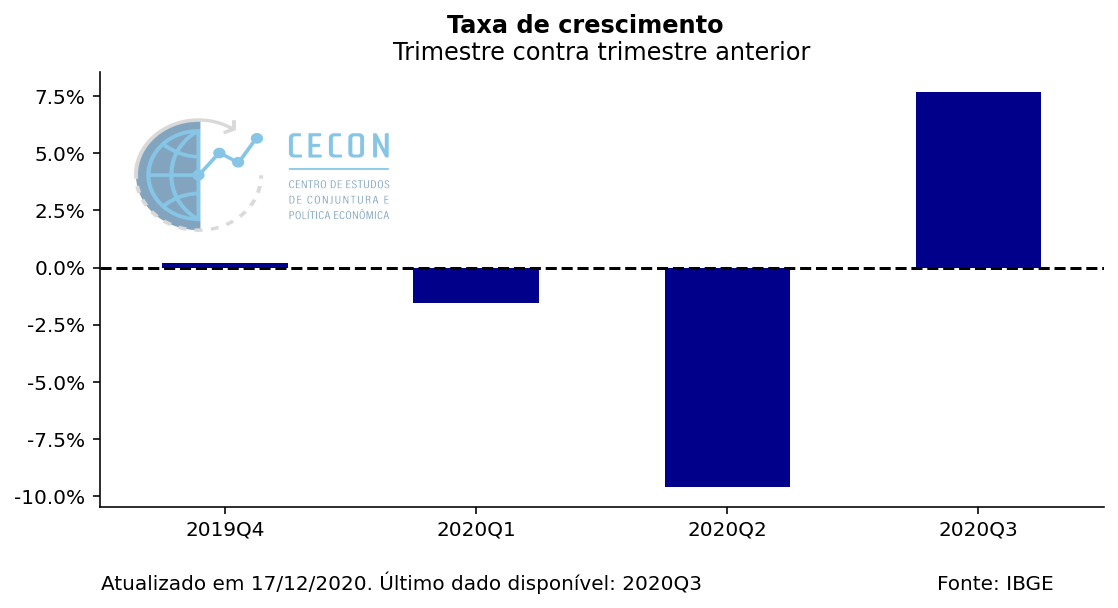

2019Q4    0.002203
2020Q1   -0.015459
2020Q2   -0.095998
2020Q3    0.077078
Freq: Q-DEC, Name: PIB, dtype: float64

In [8]:
fig = plt.figure(figsize=(9,4))
ax = plt.axes()
ax2 = plt.axes([0.15,0.6,0.2,0.2])

suptitle = 'Taxa de crescimento'
title = 'Trimestre contra trimestre anterior'


df['PIB'].pct_change().tail(4).plot(kind='bar', ax=ax, color='darkblue')
ax.axhline(y=0, ls='--', color='black')

plt.suptitle(suptitle, color='black', weight = 'bold')
ax.set_title(title, color='black')

ax.text(0.95, -0.2, 'Fonte: IBGE',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)

ax.text(0.6, -0.2, f'Atualizado em {datetime.datetime.now().strftime("%d/%m/%Y")}. Último dado disponível: {df.index[-1]}',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)

#sns.set_style("white")
sns.set_context('paper', font_scale=1.2)
sns.despine()
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y))) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

ax2.imshow(logo, aspect='auto', zorder=0, alpha=.5)
ax2.axis('off')

sns.despine()
sns.set_style('white')
fig.savefig(
    '../figs/PIB/PIB_TrixTriAnterior.svg',
    dpi = 300, 
    bbox_inches='tight',pad_inches=0
)
plt.show()

df['PIB'].pct_change().tail(4)

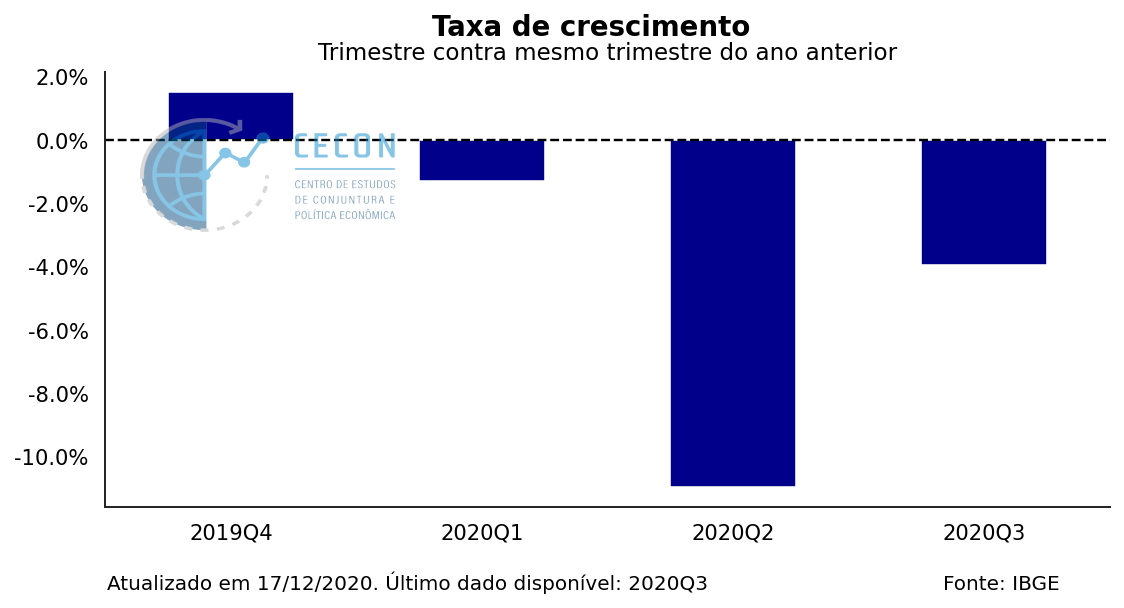

2019Q4    0.015461
2020Q1   -0.012891
2020Q2   -0.109405
2020Q3   -0.039260
Freq: Q-DEC, Name: PIB, dtype: float64

In [9]:
fig = plt.figure(figsize=(9,4))
ax = plt.axes()
ax2 = plt.axes([0.15,0.6,0.2,0.2])

suptitle = 'Taxa de crescimento'
title = 'Trimestre contra mesmo trimestre do ano anterior'


df['PIB'].pct_change(4).tail(4).plot(kind='bar', ax=ax, color='darkblue')
ax.axhline(y=0, ls='--', color='black')

plt.suptitle(suptitle, color='black', weight = 'bold')
ax.set_title(title, color='black')

ax.text(0.95, -0.2, 'Fonte: IBGE',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)

ax.text(0.6, -0.2, f'Atualizado em {datetime.datetime.now().strftime("%d/%m/%Y")}. Último dado disponível: {df.index[-1]}',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)

#sns.set_style("white")
sns.set_context('paper', font_scale=1.2)
sns.despine()
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y))) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

ax2.imshow(logo, aspect='auto', zorder=0, alpha=.5)
ax2.axis('off')

sns.despine()
sns.set_style('white')
fig.savefig(
    '../figs/PIB/PIB_TrixTriAnoAnterior.svg',
    dpi = 300, 
    bbox_inches='tight',pad_inches=0
)
plt.show()

df['PIB'].pct_change(4).tail(4)

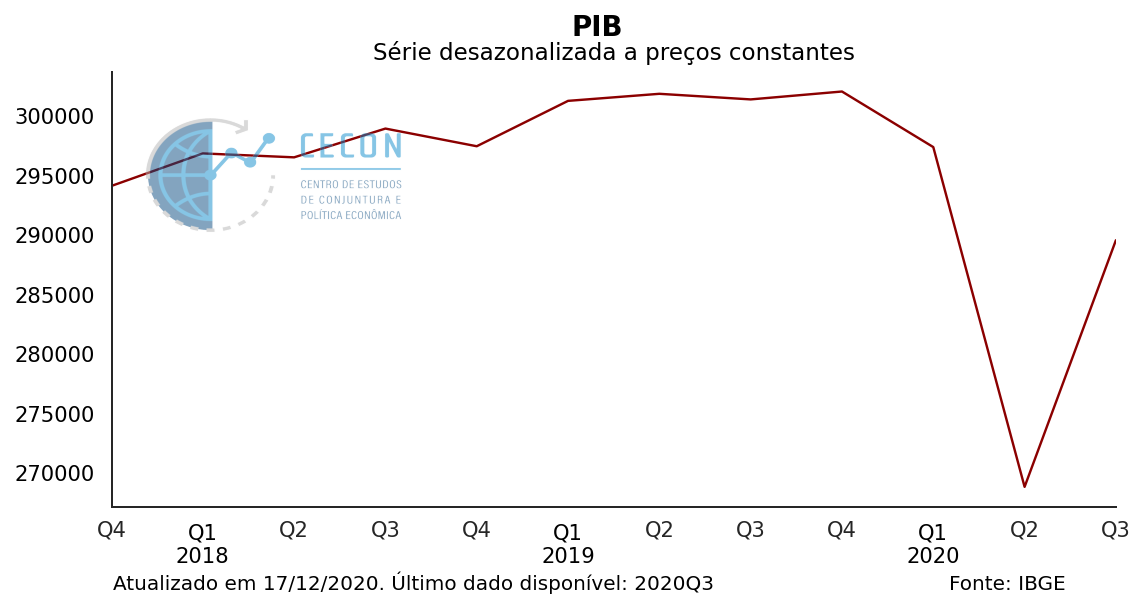

In [10]:
fig = plt.figure(figsize=(9,4))
ax = plt.axes()
ax2 = plt.axes([0.15,0.6,0.2,0.2])

suptitle = 'PIB'
title = 'Série desazonalizada a preços constantes'


df['PIB'][-12:].plot(kind='line', ax=ax, color='darkred')

plt.suptitle(suptitle, color='black', weight = 'bold')
ax.set_title(title, color='black')

ax.text(0.95, -0.2, 'Fonte: IBGE',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)

ax.text(0.6, -0.2, 'Atualizado em {}. Último dado disponível: {}'.format(datetime.datetime.now().strftime("%d/%m/%Y"), df.index[-1]),
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)

#sns.set_style("white")
sns.set_context('paper', font_scale=1.2)
sns.despine()
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')

ax2.imshow(logo, aspect='auto', zorder=0, alpha=.5)
ax2.axis('off')
fig.savefig(
    '../figs/PIB/PIB_Nivel.svg',
    dpi = 300, 
    bbox_inches='tight',pad_inches=0
)

sns.despine()
sns.set_style('white')
plt.show()

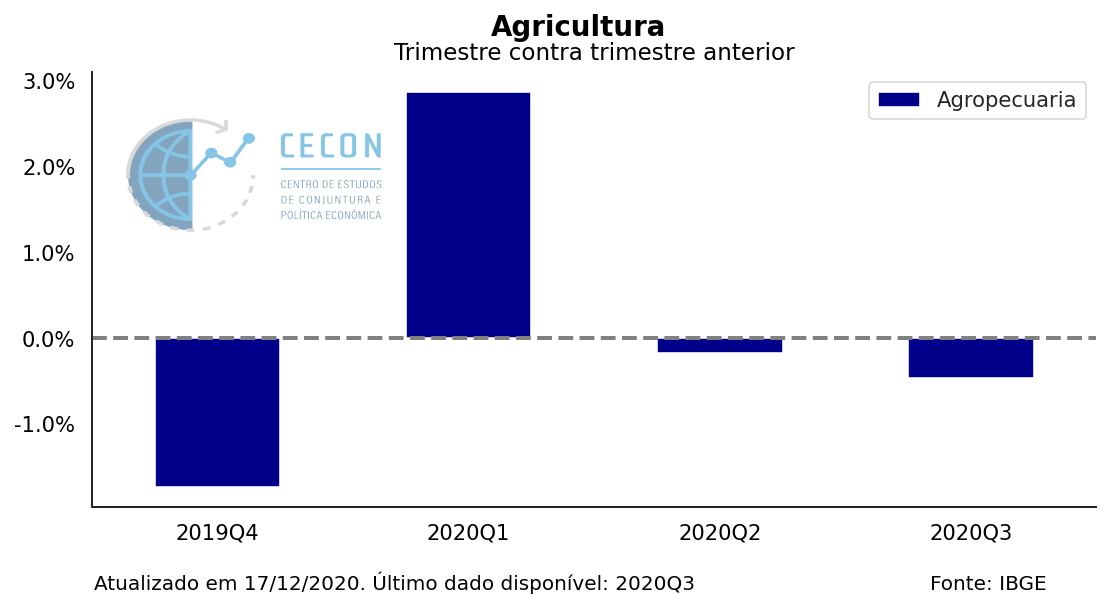

In [11]:
fig, ax = plt.subplots(figsize=(9,4))
ax2 = fig.add_axes([0.15,0.6,0.2,0.2])


df[Agropecuaria].pct_change().tail(4).plot(kind='bar', ax=ax, color='darkblue')

plt.suptitle('Agricultura', color='black', weight = 'bold')
ax.axhline(y=0, color='gray', linestyle='--', lw=2)

ax.set_title('Trimestre contra trimestre anterior', color='black')

ax.text(0.95, -0.2, 'Fonte: IBGE',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)

ax.text(0.6, -0.2, 'Atualizado em {}. Último dado disponível: {}'.format(datetime.datetime.now().strftime("%d/%m/%Y"), df.index[-1]),
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)

#sns.set_style("white")
sns.set_context('paper', font_scale=1.2)
sns.despine()
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y))) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

ax2.imshow(logo, aspect='auto', zorder=0, alpha=.5)
ax2.axis('off')
fig.savefig(
    '../figs/PIB/Agro_TrixTriAnterior.svg',
    dpi = 300, 
    bbox_inches='tight',pad_inches=0
)

plt.show()

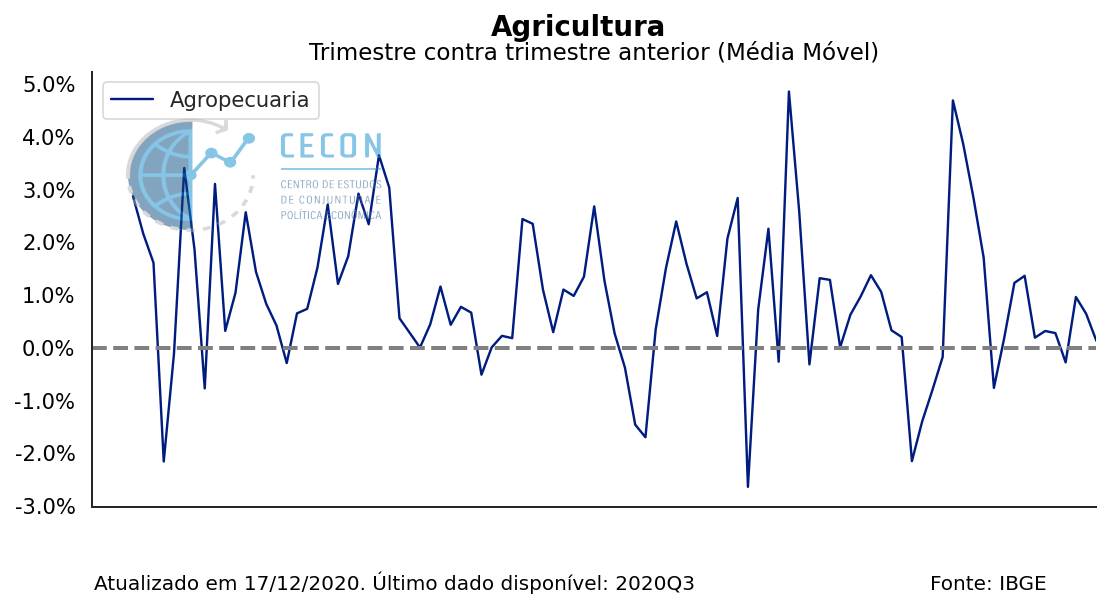

In [12]:
fig, ax = plt.subplots(figsize=(9,4))
ax2 = fig.add_axes([0.15,0.6,0.2,0.2])


df[Agropecuaria].pct_change().rolling(4).mean().plot(ax=ax)

plt.suptitle('Agricultura', color='black', weight = 'bold')
ax.axhline(y=0, color='gray', linestyle='--', lw=2)

ax.set_title('Trimestre contra trimestre anterior (Média Móvel)', color='black')

ax.text(0.95, -0.2, 'Fonte: IBGE',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)

ax.text(0.6, -0.2, 'Atualizado em {}. Último dado disponível: {}'.format(datetime.datetime.now().strftime("%d/%m/%Y"), df.index[-1]),
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)

#sns.set_style("white")
sns.set_context('paper', font_scale=1.2)
sns.despine()
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y))) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

ax2.imshow(logo, aspect='auto', zorder=0, alpha=.5)
ax2.axis('off')
plt.show()

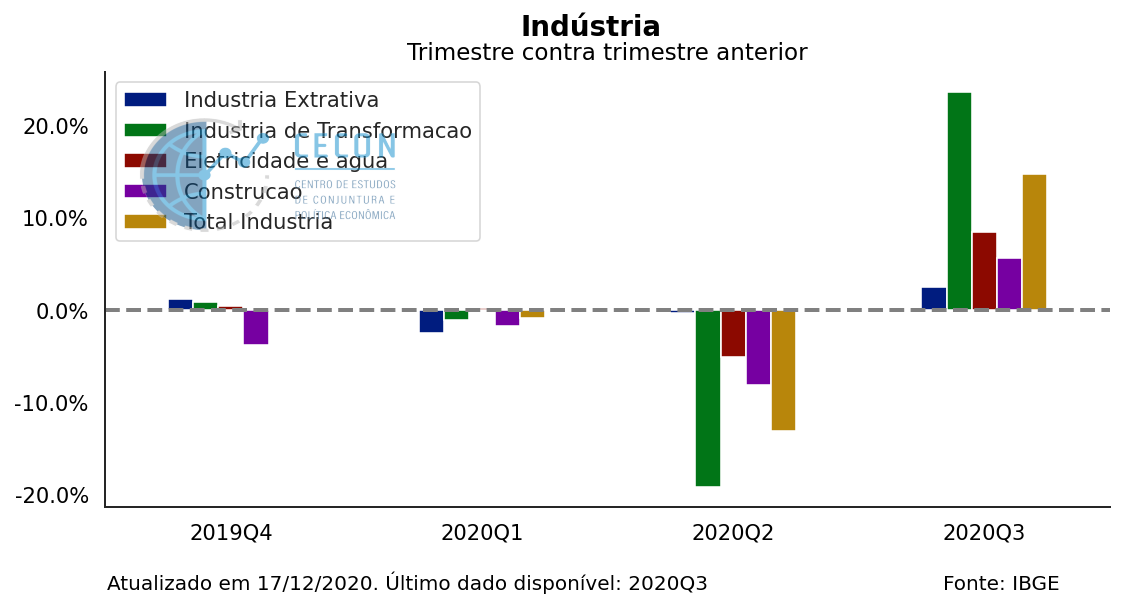

,Industria Extrativa,Industria de Transformacao,Eletricidade e agua,Construcao,Total Industria
2019Q4,0.011824,0.009037,0.004970,-0.037648,0.000580
2020Q1,-0.024993,-0.010860,0.002693,-0.017272,-0.008609
2020Q2,-0.003373,-0.191145,-0.050552,-0.080516,-0.130434
2020Q3,0.025302,0.236742,0.084899,0.056440,0.147658


In [13]:
fig, ax = plt.subplots(figsize=(9,4))
ax2 = fig.add_axes([0.15,0.6,0.2,0.2])


df[Industria].pct_change().tail(4).plot(kind='bar', ax=ax)

plt.suptitle('Indústria', color='black', weight = 'bold')
ax.axhline(y=0, color='gray', linestyle='--', lw=2)

ax.set_title('Trimestre contra trimestre anterior', color='black')

ax.text(0.95, -0.2, 'Fonte: IBGE',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)

ax.text(0.6, -0.2, 'Atualizado em {}. Último dado disponível: {}'.format(datetime.datetime.now().strftime("%d/%m/%Y"), df.index[-1]),
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)

#sns.set_style("white")
sns.set_context('paper', font_scale=1.2)
sns.despine()
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y))) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

ax2.imshow(logo, aspect='auto', zorder=0, alpha=.5)
ax2.axis('off')
plt.show()
fig.savefig(
    '../figs/PIB/Industria_TrixTriAnterior.svg',
    dpi = 300, 
    bbox_inches='tight',pad_inches=0
)

df[Industria].pct_change().tail(4)

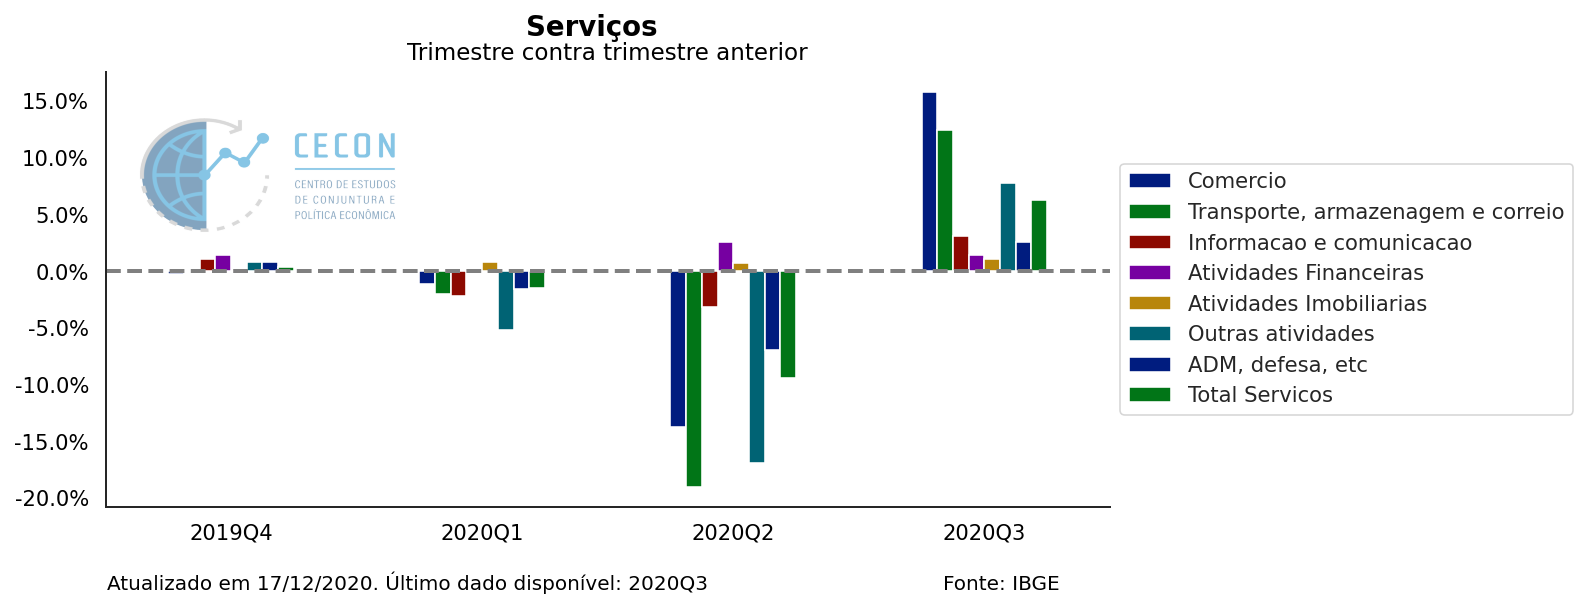

,Comercio,"Transporte, armazenagem e correio",Informacao e comunicacao,Atividades Financeiras,Atividades Imobiliarias,Outras atividades,"ADM, defesa, etc",Total Servicos
1996Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996Q2,0.013911,-0.022240,0.015129,0.003332,0.006362,0.003483,0.019968,0.006652
1996Q3,0.027924,0.032960,0.022244,-0.000154,0.009057,0.003210,0.005066,0.013433
1996Q4,0.013407,-0.039419,-0.001653,-0.084281,-0.024478,-0.005327,-0.005696,-0.020232
1997Q1,0.000391,0.047790,0.010417,0.105709,0.022929,0.019057,-0.000411,0.019513
...,...,...,...,...,...,...,...,...
2019Q3,0.005113,0.004301,0.009530,0.014628,0.001986,-0.003471,-0.006701,0.002394
2019Q4,-0.002298,0.000091,0.010576,0.014177,0.000602,0.007904,0.007719,0.004045
2020Q1,-0.010817,-0.019667,-0.021880,0.001879,0.007738,-0.051438,-0.015975,-0.014847
2020Q2,-0.137145,-0.190152,-0.031795,0.025597,0.007622,-0.168683,-0.069736,-0.094417


In [14]:
fig, ax = plt.subplots(figsize=(9,4))
ax2 = fig.add_axes([0.15,0.6,0.2,0.2])


df[Servicos].pct_change().tail(4).plot(kind='bar', ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.suptitle('Serviços', color='black', weight = 'bold')

ax.axhline(y=0, color='gray', linestyle='--', lw=2)

ax.set_title('Trimestre contra trimestre anterior', color='black')

ax.text(0.95, -0.2, 'Fonte: IBGE',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)

ax.text(0.6, -0.2, 'Atualizado em {}. Último dado disponível: {}'.format(datetime.datetime.now().strftime("%d/%m/%Y"), df.index[-1]),
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)

#sns.set_style("white")
sns.set_context('paper', font_scale=1.2)
sns.despine()
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y))) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

ax2.imshow(logo, aspect='auto', zorder=0, alpha=.5)
ax2.axis('off')
plt.show()
fig.savefig(
    '../figs/PIB/Servicos_TrixTriAnterior.svg',
    dpi = 300, 
    bbox_inches='tight',pad_inches=0
)

df[Servicos].pct_change()

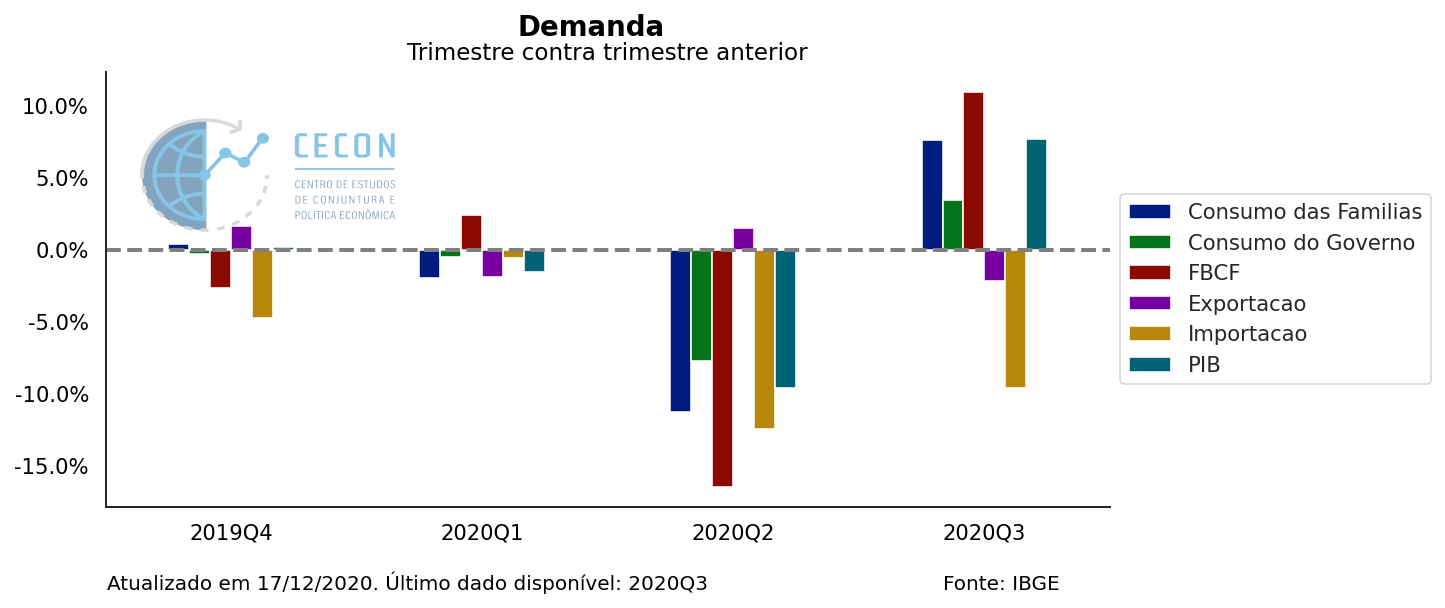

,Consumo das Familias,Consumo do Governo,FBCF,Exportacao,Importacao,PIB
2019Q4,0.004383,-0.002582,-0.026712,0.016505,-0.047445,0.002203
2020Q1,-0.019767,-0.004895,0.024205,-0.018541,-0.005370,-0.015459
2020Q2,-0.112740,-0.077315,-0.164762,0.015526,-0.124499,-0.095998
2020Q3,0.076406,0.034854,0.110196,-0.021298,-0.095888,0.077078


In [15]:
fig, ax = plt.subplots(figsize=(9,4))
ax2 = fig.add_axes([0.15,0.6,0.2,0.2])


df[Demanda + ['PIB']].pct_change().tail(4).plot(kind='bar', ax=ax)

plt.suptitle('Demanda', color='black', weight = 'bold')
ax.axhline(y=0, color='gray', linestyle='--', lw=2)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ax.set_title('Trimestre contra trimestre anterior', color='black')

ax.text(0.95, -0.2, 'Fonte: IBGE',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)

ax.text(0.6, -0.2, 'Atualizado em {}. Último dado disponível: {}'.format(datetime.datetime.now().strftime("%d/%m/%Y"), df.index[-1]),
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)

#sns.set_style("white")
sns.set_context('paper', font_scale=1.2)
sns.despine()
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y))) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

ax2.imshow(logo, aspect='auto', zorder=0, alpha=.5)
ax2.axis('off')
plt.show()
fig.savefig(
    '../figs/PIB/Demanda_TrixTriAnterior.svg',
    dpi = 300, 
    bbox_inches='tight',pad_inches=0
)

df[Demanda + ['PIB']].pct_change().tail(4)

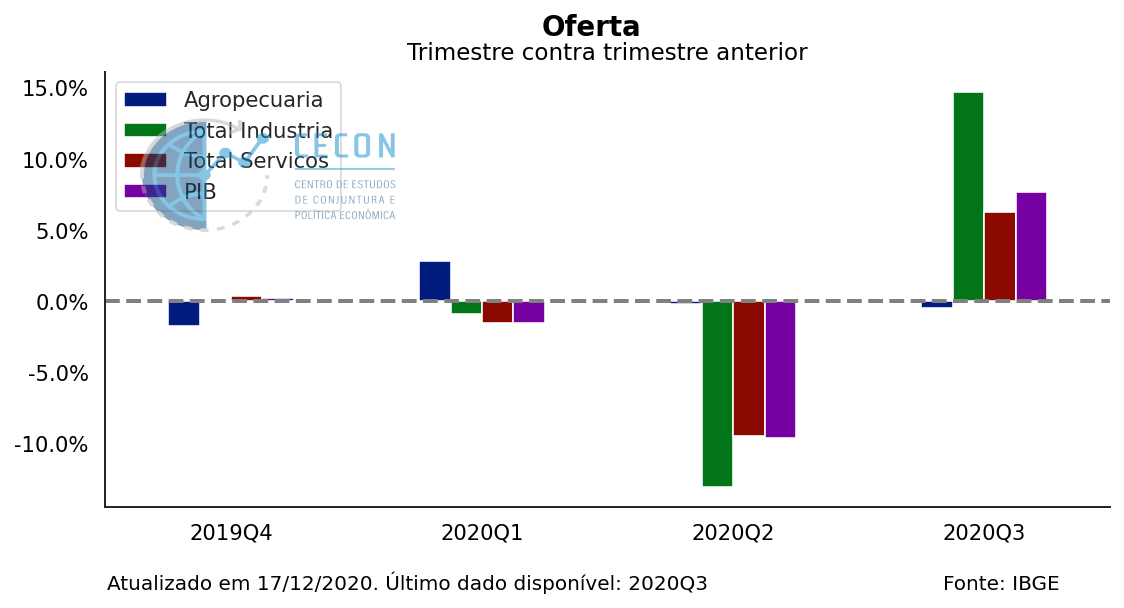

,Agropecuaria,Total Industria,Total Servicos,PIB
2019Q4,-0.017312,0.000580,0.004045,0.002203
2020Q1,0.028747,-0.008609,-0.014847,-0.015459
2020Q2,-0.001706,-0.130434,-0.094417,-0.095998
2020Q3,-0.004647,0.147658,0.063183,0.077078


In [16]:
fig, ax = plt.subplots(figsize=(9,4))
ax2 = fig.add_axes([0.15,0.6,0.2,0.2])


df[Oferta + ['PIB']].pct_change().tail(4).plot(kind='bar', ax=ax)

plt.suptitle('Oferta', color='black', weight = 'bold')
ax.axhline(y=0, color='gray', linestyle='--', lw=2)
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ax.set_title('Trimestre contra trimestre anterior', color='black')

ax.text(0.95, -0.2, 'Fonte: IBGE',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)

ax.text(0.6, -0.2, 'Atualizado em {}. Último dado disponível: {}'.format(datetime.datetime.now().strftime("%d/%m/%Y"), df.index[-1]),
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)

#sns.set_style("white")
sns.set_context('paper', font_scale=1.2)
sns.despine()
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y))) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

ax2.imshow(logo, aspect='auto', zorder=0, alpha=.5)
ax2.axis('off')
plt.show()
fig.savefig(
    '../figs/PIB/Oferta_TrixTriAnterior.svg',
    dpi = 300, 
    bbox_inches='tight',pad_inches=0
)

df[Oferta + ['PIB']].pct_change().tail(4)

In [17]:
df[Demanda + ["PIB"]].pct_change().tail(4).round(4)*100

,Consumo das Familias,Consumo do Governo,FBCF,Exportacao,Importacao,PIB
2019Q4,0.44,-0.26,-2.67,1.65,-4.74,0.22
2020Q1,-1.98,-0.49,2.42,-1.85,-0.54,-1.55
2020Q2,-11.27,-7.73,-16.48,1.55,-12.45,-9.60
2020Q3,7.64,3.49,11.02,-2.13,-9.59,7.71


In [18]:
df[Oferta + ["PIB"]].pct_change().tail(4).round(4)*100

,Agropecuaria,Total Industria,Total Servicos,PIB
2019Q4,-1.73,0.06,0.40,0.22
2020Q1,2.87,-0.86,-1.48,-1.55
2020Q2,-0.17,-13.04,-9.44,-9.60
2020Q3,-0.46,14.77,6.32,7.71


# Decomposição


## Demanda

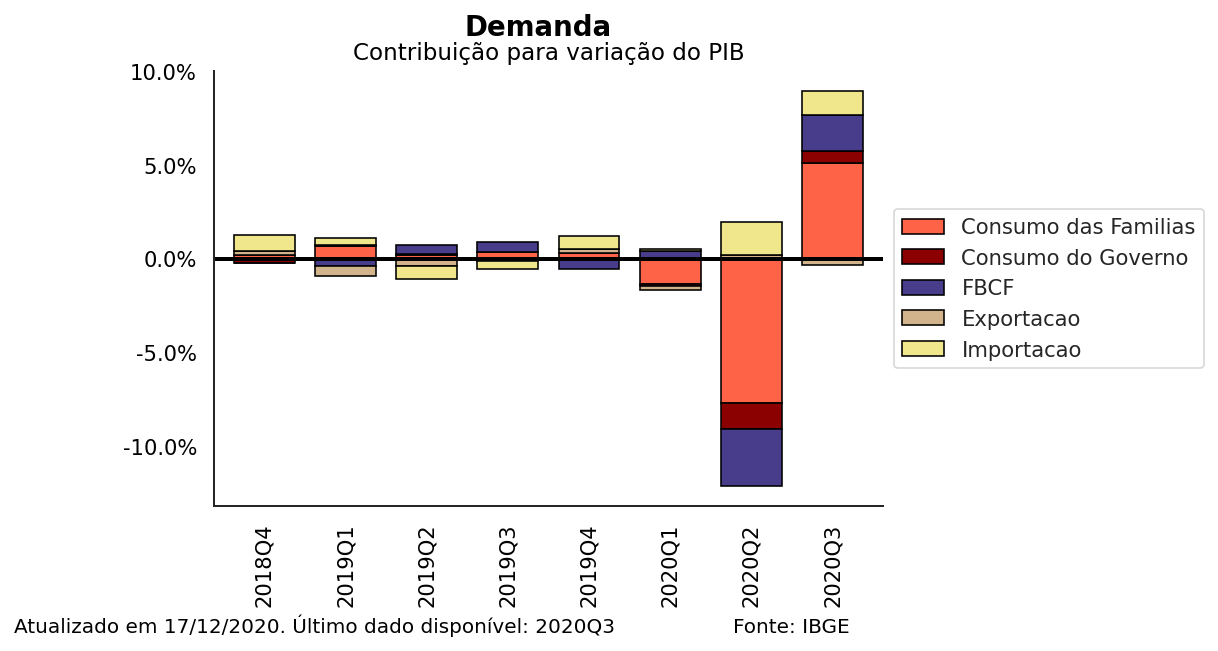

,Consumo das Familias,Consumo do Governo,FBCF,Exportacao,Importacao
2018Q4,0.001759,-0.002239,-0.000150,0.002336,0.008746
2019Q1,0.007013,0.000322,-0.003797,-0.005622,0.003713
2019Q2,0.002069,0.000217,0.005257,-0.003836,-0.007107
2019Q3,0.003405,-0.000267,0.005346,-0.000924,-0.004419
2019Q4,0.003002,-0.000469,-0.004901,0.002209,0.006893
2020Q1,-0.013568,-0.000884,0.004313,-0.002516,0.000742
2020Q2,-0.077046,-0.014113,-0.030542,0.002101,0.017368
2020Q3,0.051249,0.006494,0.018873,-0.003237,0.012955


In [19]:
fig = plt.Figure()
ax = plt.gca()
ax2 = fig.add_axes([0.15,0.7,0.2,0.2])

df[Demanda].diff().apply(lambda x: x/(df["PIB"].shift())).tail(8).plot(
    kind = 'bar', 
    stacked = True, 
    ax = ax,
    color = (
        "tomato",
        "darkred",
        "darkslateblue",
        "tan",
        "khaki"
    ),
    width = 0.75,
    edgecolor='black'
)
plt.suptitle('Demanda', color='black', weight = 'bold')
ax.axhline(y=0, color='black', linestyle='-', lw=2)
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ax.set_title('Contribuição para variação do PIB', color='black')

ax.text(0.95, -0.3, 'Fonte: IBGE',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)

ax.text(0.6, -0.3, 'Atualizado em {}. Último dado disponível: {}'.format(datetime.datetime.now().strftime("%d/%m/%Y"), df.index[-1]),
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)

#sns.set_style("white")
sns.set_context('paper', font_scale=1.2)
sns.despine()
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y))) 
#ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax2.imshow(logo, aspect='auto', zorder=0, alpha=.5)
ax2.axis('off')
plt.show()
fig.savefig(
    '../figs/PIB/ContribVar_Demanda.svg',
    dpi = 300, 
    bbox_inches='tight',pad_inches=0
)

df[Demanda].diff().apply(lambda x: x/(df["PIB"].shift())).tail(8)

## Oferta

/home/gpetrini/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:226: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(
/home/gpetrini/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/style.py:27: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


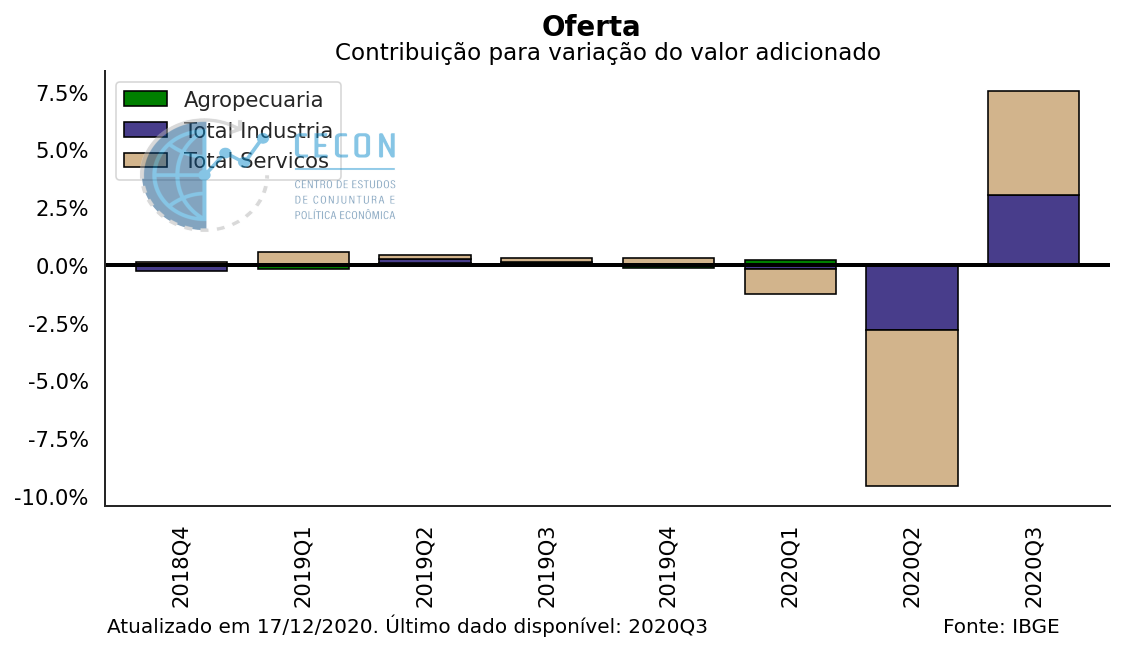

,Agropecuaria,Total Industria,Total Servicos
2018Q4,0.000385,-0.002477,0.000941
2019Q1,-0.001660,0.000468,0.005336
2019Q2,0.000856,0.001882,0.001711
2019Q3,0.001242,-0.000396,0.001705
2019Q4,-0.001377,0.000124,0.002887
2020Q1,0.002233,-0.001832,-0.010575
2020Q2,-0.000139,-0.028106,-0.067661
2020Q3,-0.000416,0.030392,0.045041


In [20]:
fig, ax = plt.subplots(1,1,figsize=(9,4))
ax2 = fig.add_axes([0.15,0.6,0.2,0.2])


#df["PIB"].pct_change().tail(12).plot(ax = ax, kind = 'line', legend = True, color = 'black')
df[Oferta].diff().apply(lambda x: x/(df["VA"].shift())).tail(8).plot(
    kind = 'bar', 
    stacked = True, 
    ax = ax,
    color = (
        "green",
    #    "darkred",
        "darkslateblue",
        "tan",
    #    "khaki"
    ),
    cmap="Set1",
    width = 0.75,
    edgecolor='black'
)

plt.suptitle('Oferta', color='black', weight = 'bold')
ax.axhline(y=0, color='black', linestyle='-', lw=2)
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ax.set_title('Contribuição para variação do valor adicionado', color='black')

ax.text(0.95, -0.3, 'Fonte: IBGE',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)

ax.text(0.6, -0.3, 'Atualizado em {}. Último dado disponível: {}'.format(datetime.datetime.now().strftime("%d/%m/%Y"), df.index[-1]),
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)

#sns.set_style("white")
sns.set_context('paper', font_scale=1.2)
sns.despine()
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y))) 
#ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

ax2.imshow(logo, aspect='auto', zorder=0, alpha=.5)
ax2.axis('off')
plt.show()
fig.savefig(
    '../figs/PIB/ContribVar_Oferta.svg',
    dpi = 300, 
    bbox_inches='tight',pad_inches=0
)

df[Oferta].diff().apply(lambda x: x/(df["VA"].shift())).tail(8)

In [21]:
df[Oferta].diff().apply(lambda x: x/(df["VA"].shift())).tail(2)

,Agropecuaria,Total Industria,Total Servicos
2020Q2,-0.000139,-0.028106,-0.067661
2020Q3,-0.000416,0.030392,0.045041


# Carregamento estatístico

In [22]:
current_year = int(str(df.index[-1])[:4])
#current_year=2020
current_quarter = int(str(df.index[-1])[-1])
#current_quarter = 1
carregamento = df[["PIB"]] # Check se com ajuste ou não

In [23]:
for rep in range(int(current_quarter)+1,5): # Check +1

    carregamento.loc[f"{current_year}Q{rep}"] = df["PIB"].iloc[-1]
    

carregamento_estat = (carregamento[["PIB"]].iloc[-4:].mean())/(carregamento[["PIB"]].iloc[-8:-4].mean()) - 1
print(f"O carregamento estatístico é de {carregamento_estat}")

O carregamento estatístico é de PIB   -0.050753
dtype: float64


/home/gpetrini/.local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


## Crescimento esperado pelo FMI

# Encerrando

In [24]:
t2 = dt.datetime.now()
print(f"Fim do script: {t2}")
print(f'Tempo de execução: {t2-t1}')

Fim do script: 2020-12-17 17:03:49.638259
Tempo de execução: 0:00:12.075149
